In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf


In [2]:
df = pd.read_excel("./최종_1.xlsx", index_col = 'IDX')

In [3]:
df.head()

,발생날짜,요일,공휴일여부,오전오후,시간대,시간,사고인지 시간,공공/민간 구분,날씨,기온,...,습도.1,증기압,이슬점온도,현지기압,해면기압,일조,전운량,중하층운량,시정,지면온도
IDX,,,,,,,,,,,,,,,,,,,,,
0,2024-04-12,금요일,평일,오전,10,10:30,정규작업,공공,맑음,18℃,...,58.0,11.0,8.4,1004.1,1020.7,1.0,0.0,0.0,2047.0,32.0
1,2024-04-13,토요일,휴일,오전,8,8:47,정규작업,공공,맑음,18℃,...,66.0,12.7,10.5,1009.3,1017.5,0.9,1.0,0.0,1944.0,15.9
2,2024-04-12,금요일,평일,오전,9,9:00,정규작업,민간,맑음,17℃,...,76.0,14.3,12.3,1018.4,1019.1,1.0,6.0,0.0,1105.0,20.3
3,2024-04-12,금요일,평일,오전,10,10:30,정규작업,공공,맑음,18℃,...,58.0,11.0,8.4,1004.1,1020.7,1.0,0.0,0.0,2047.0,32.0
4,2024-04-13,토요일,휴일,오전,11,11:30,정규작업,민간,맑음,19℃,...,61.0,15.8,13.8,1009.7,1017.8,1.0,0.0,0.0,2050.0,37.0


In [4]:
df.columns

Index(['발생날짜', '요일', '공휴일여부', '오전오후', '시간대', '시간', '사고인지 시간', '공공/민간 구분', '날씨',
       '기온', '습도', '인적사고', '보호(방호)조치여부 - 안전방호', '보호(방호)조치여부 - 개인방호', '공종_대분류',
       '공종_중분류', '사고객체_대분류', '사고객체_중분류', '작업프로세스', '장소_대분류', '장소_중분류',
       '부위_대분류', '부위_중분류', '사고원인_주원인', '사상자수', '사고신고사유_부상', '사고신고사유_사망',
       '사고신고사유_물적', '시', '전체공사비', '전체공사비_분류', '해당공종_공사비', '구체적 사고원인',
       '사고발생후 조치사항', '공사기간_시작일', '공사기간_종료일', '공종_시작일', '공종_종료일', '재발방지대책',
       '공정률', '안전관리계획', '설계안전성검토', '작업자수', '지점 번호', '관측소', '기온.1', '강수량', '풍속',
       '풍향', '습도.1', '증기압', '이슬점온도', '현지기압', '해면기압', '일조', '전운량', '중하층운량',
       '시정', '지면온도'],
      dtype='object')

In [5]:
df2 = df.copy()

In [6]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23722 entries, 0 to 23721
Data columns (total 59 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   발생날짜               23722 non-null  datetime64[ns]
 1   요일                 23722 non-null  object        
 2   공휴일여부              23722 non-null  object        
 3   오전오후               23722 non-null  object        
 4   시간대                23722 non-null  int64         
 5   시간                 23722 non-null  object        
 6   사고인지 시간            20555 non-null  object        
 7   공공/민간 구분           23707 non-null  object        
 8   날씨                 23722 non-null  object        
 9   기온                 23722 non-null  object        
 10  습도                 23722 non-null  float64       
 11  인적사고               23690 non-null  object        
 12  보호(방호)조치여부 - 안전방호  18311 non-null  object        
 13  보호(방호)조치여부 - 개인방호  18312 non-null  object        
 14  공종_대분류     

In [7]:
df2.describe(include = 'O').T

,count,unique,top,freq
요일,23722,7,월요일,4076
공휴일여부,23722,2,평일,19433
오전오후,23722,2,오전,12635
시간,23722,794,10:00,1285
사고인지 시간,20555,8,정규작업,18032
공공/민간 구분,23707,2,민간,13612
날씨,23722,6,맑음,17995
기온,23722,591,20℃,1382
인적사고,23690,16,넘어짐,5814
보호(방호)조치여부 - 안전방호,18311,3,조치,11586


In [8]:
df2['인적사고'] = df2['인적사고'].apply(lambda x : '분류불능' if x == '기타' else x)
df2 = df2[df2['인적사고'] != '없음']

In [9]:
def daynight(x):
    if x < 6:
        return '야간'
    elif x <= 18:
        return '주간'
    else:
        return '야간'

In [10]:
df2['분기'] = df2['발생날짜'].dt.quarter.astype('category')
df2['월'] = df2['발생날짜'].dt.month.astype('category')
df2['주야간'] = df2['시간대'].apply(daynight)
df2['시간대'] = df2['시간대'].astype('category')

In [11]:
drop_cols = ['기온', '습도', '구체적 사고원인', '사고발생후 조치사항', '재발방지대책', '공사기간_시작일', '공사기간_종료일', '공종_시작일',
             '공종_종료일', '관측소', '시간', '발생날짜', '지점 번호', '전체공사비_분류']

In [12]:
df2.isnull().sum().sort_values(ascending=False)

강수량                  21917
보호(방호)조치여부 - 안전방호     5215
보호(방호)조치여부 - 개인방호     5214
사고인지 시간               3162
일조                     765
                     ...  
사고신고사유_물적                0
시                        0
전체공사비                    0
전체공사비_분류                 0
주야간                      0
Length: 62, dtype: int64

In [13]:
df2['보호(방호)조치여부 - 안전방호'].value_counts()

보호(방호)조치여부 - 안전방호
조치      11586
해당없음     5567
비조치      1158
Name: count, dtype: int64

In [14]:
df2['보호(방호)조치여부 - 개인방호'].value_counts()

보호(방호)조치여부 - 개인방호
조치      14470
해당없음     2985
비조치       857
Name: count, dtype: int64

In [15]:
df2['보호(방호)조치여부 - 안전방호'] = df2['보호(방호)조치여부 - 안전방호'].fillna('비조치')
df2['보호(방호)조치여부 - 개인방호'] = df2['보호(방호)조치여부 - 개인방호'].fillna('비조치')

In [16]:
df2['사고인지 시간'] = df2['사고인지 시간'].fillna('분류불능')
df2['강수량'] = df2['강수량'].fillna(0)

In [17]:
df2['총_공사기간'] = (pd.to_datetime(df2['공사기간_종료일']) - pd.to_datetime(df2['공사기간_시작일'])).dt.days
df2['공종공사기간'] = (pd.to_datetime(df2['공종_종료일']) - pd.to_datetime(df2['공종_시작일'])).dt.days

In [18]:
def mapping(S : pd.Series, tol = 50, etc_name = '기타'):
    counts = S.value_counts()
    counts = counts[counts < tol]
    tmp_dict = {}
    for i in counts.index:
        tmp_dict[i] = etc_name
    
    S2 = S.apply(lambda x : tmp_dict[x] if x in tmp_dict.keys() else x)
    return S2

In [19]:
df2['공종_대분류'] = mapping(df2['공종_대분류'], tol = 1000)
df2['공종_대분류'].value_counts()

공종_대분류
건축      14286
토목       5287
기타       2940
기계설비     1013
Name: count, dtype: int64

In [20]:
df2['공종_중분류'] = mapping(df2['공종_중분류'], tol = 200)
df2['공종_중분류'].value_counts()

공종_중분류
철근콘크리트공사     7066
기타           3176
가설공사         2542
해체 및 철거공사    1044
기계설비공사        952
토공사           917
철골공사          778
건축물 부대공사      643
수장공사          598
관공사           564
건축 토공사        553
미장공사          536
전기설비공사        518
타일 및 돌공사      458
도로 및 포장공사     397
교량공사          344
조적공사          333
도장공사          301
터널공사          290
산업설비공사        287
목공사           277
금속공사          270
창호 및 유리공사     245
하천공사          227
방수공사          210
Name: count, dtype: int64

In [21]:
df2['사고객체_대분류'].value_counts()

사고객체_대분류
가시설        6643
기타         5152
건설자재       4568
건설공구       2468
건설기계       1846
부재          978
시설물         968
토사 및 암반     540
질병          363
Name: count, dtype: int64

In [22]:
df2['사고객체_중분류'] = mapping(df2['사고객체_중분류'], tol = 100)
df2['사고객체_중분류'].value_counts()

사고객체_중분류
기타                6947
자재                2783
공구류               2008
거푸집               1844
비계                1366
철근                1024
건물                 799
작업발판               758
기타 가시설             552
흙막이가시설             449
굴착기                446
사다리                445
시스템동바리             432
질병                 363
철골부재               319
강관동바리              251
안전시설물              223
기중기(이동식크레인 등)      216
슬래브                202
배관                 200
고소작업차(고소작업대 등)     195
차량                 182
가설계단               181
덤프트럭               161
데크플레이트             160
지반                 149
타워크레인              139
항타 및 항발기           136
굴착사면               133
파이프서포트             133
지게차                113
창호                 111
건설폐기물              106
Name: count, dtype: int64

In [23]:
df2['작업프로세스'] = mapping(df2['작업프로세스'], tol = 100)
df2['작업프로세스'].value_counts()

작업프로세스
설치작업         4125
해체작업         2525
이동           2521
기타           2192
운반작업         2071
정리작업         1550
조립작업         1131
형틀 및 목공       933
타설작업          794
마감작업          785
절단작업          687
준비작업          595
설비작업          364
청소작업          303
도장작업          286
굴착작업          273
연결작업          250
상차 및 하역작업     247
용접작업          246
인양작업          235
양중작업          169
확인 및 점검작업     168
쌓기작업          160
매설작업          156
보수 및 교체작업     155
천공작업          149
전기작업          130
부설 및 다짐작업     113
정비작업          112
반출작업          101
Name: count, dtype: int64

In [24]:
df2['장소_대분류'] = mapping(df2['장소_대분류'], tol = 200)
df2['장소_대분류'].value_counts()

장소_대분류
공동주택       7027
기타         4676
공장         1920
업무시설       1776
교육연구시설     1492
근린생활시설     1424
도로          917
창고시설        723
하수도         563
부지조성        484
문화및집회시설     453
상수도         382
숙박시설        347
도로교량        340
단독주택        300
운동시설        243
의료시설        231
교정및군사시설     228
Name: count, dtype: int64

In [25]:
df2['부위_대분류'] = mapping(df2['부위_대분류'], tol = 200)
df2['부위_대분류'].value_counts()

부위_대분류
기타               8846
자재               2783
공구류              2008
거푸집              1844
비계               1366
철근               1024
건물                799
작업발판              758
기타 가시설            552
흙막이가시설            449
굴착기               446
사다리               445
시스템동바리            432
질병                363
철골부재              319
강관동바리             251
안전시설물             223
기중기(이동식크레인 등)     216
슬래브               202
배관                200
Name: count, dtype: int64

In [26]:
df2['부위_중분류'].value_counts()

부위_중분류
바닥        7371
기타        6542
상부(위)     3801
하부(아래)    1333
옆         1302
지하        1255
고소         937
앞          693
뒤          219
계단          73
Name: count, dtype: int64

In [27]:
df2['사고원인_주원인'] = mapping(df2['사고원인_주원인'], tol = 150)
df2['사고원인_주원인'].value_counts()

사고원인_주원인
작업자 부주의              13030
기타                    4122
작업자의 불안전한 행동          1887
작업자 통제 미흡              749
위험정보 미제공               650
작업순서 미준수               595
운전자 자격관리 미흡            417
시공품질 미확보               411
시공관리 미흡                371
시방기준 등 미준수             299
개인 안전보호구 착용 불량         292
부적정 기계장비 사용 통제 미흡      196
사전 설계도서검토 미흡           181
안전관리계획 수립 미흡           172
구조안전 미확보               154
Name: count, dtype: int64

In [28]:
cost_dict = {"분류불능" : 0, '1,000만원 미만' : 1, '1,000만 ~ 2,000만원 미만' : 2, '2,000만 ~ 4,000만원 미만' : 3, '4,000만 ~ 1억원 미만' : 4,
             '1억 ~ 2억원 미만' : 5, '2억 ~ 3억원 미만' : 6, '3억 ~ 5억원 미만' : 7, '5억 ~ 10억원 미만' : 8, '10억 ~ 20억원 미만' : 9,
             '20억 ~ 50억원 미만' : 10, '50억 ~ 100억원 미만' : 11, '100억 ~ 150억원 미만' : 12, '150억 ~ 200억원 미만' : 13, '200억 ~ 300억원 미만' : 14,
             '300억 ~ 500억원 미만' : 15, '500억 ~ 1,000억원 미만' : 16, '1,000억원 이상' : 17}
df2['전체공사비'] = df2['전체공사비'].map(cost_dict)
df2['전체공사비'].value_counts()

전체공사비
17    7944
16    2650
11    1994
10    1873
15    1788
12    1526
14    1407
9     1010
13     977
8      735
7      460
5      265
6      251
4      192
0      115
2      115
3      114
1      110
Name: count, dtype: int64

In [29]:
tmp_li = list(cost_dict.keys()).copy()

for i in tmp_li:
    i2 = i.replace(" ", "")
    cost_dict[i2] = cost_dict[i]
df2['해당공종_공사비'] = df2['해당공종_공사비'].map(cost_dict)
df2['해당공종_공사비'].value_counts()

해당공종_공사비
10.0    3025
9.0     2375
11.0    2110
8.0     1904
0.0     1900
12.0    1576
1.0     1519
5.0     1212
4.0     1091
14.0    1086
7.0     1024
13.0     942
15.0     873
6.0      741
17.0     585
16.0     531
3.0      525
2.0      506
Name: count, dtype: int64

In [30]:
tmp_dict = {'19인 이하' : 0, '20~49인' : 1, '50~99인' : 2, '100~299인' : 3, '300~499인' : 4, '500인 이상' : 5}
df2['작업자수'] = df2['작업자수'].map(tmp_dict)
df2['작업자수'].value_counts()

작업자수
0    7921
3    4808
1    4279
2    3123
5    1966
4    1429
Name: count, dtype: int64

In [31]:
df3 = df2.drop(drop_cols, axis = 1)

In [32]:
import sys
sys.path.append("/home/yjg1005/nas/Python/Mega_IT")

from yjk_module.preprocessing import *
from yjk_module.ml_module import *
from yjk_module.dl_module import *

2024-05-03 22:50:23.329085: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-03 22:50:23.331303: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-03 22:50:23.357033: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-03 22:50:23.979240: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [33]:
pp = YjkPreprocessor()
pp.set_strategy(outline = None)

아래와 같이 처리합니다.
+-------------+----------------+
| 범주        | 처리방법       |
|-------------+----------------|
| 이상치 처리 | 처리하지 않음  |
| 결측치 처리 | 중앙값 대체    |
| 스케일러    | StandardScaler |
| 인코딩      | 원핫인코딩     |
+-------------+----------------+


In [34]:
df_p = pp.fit_transform(df3, yname = '인적사고', ylabeling = True)

데이터프레임 크기 : (23526, 50)

[열별 결측치 개수]
+-----------------+-------------+
| 열명            |   결측치 수 |
|-----------------+-------------|
| 공공/민간 구분  |          15 |
| 인적사고        |          32 |
| 해당공종_공사비 |           1 |
| 공정률          |           1 |
| 안전관리계획    |           1 |
| 설계안전성검토  |           1 |
| 기온.1          |          13 |
| 풍속            |          26 |
| 풍향            |          27 |
| 습도.1          |          15 |
| 증기압          |          15 |
| 이슬점온도      |          15 |
| 현지기압        |          15 |
| 해면기압        |          15 |
| 일조            |         765 |
| 전운량          |         263 |
| 중하층운량      |         664 |
| 시정            |          92 |
| 지면온도        |          43 |
+-----------------+-------------+

연속형 데이터 컬럼 : ['사상자수', '전체공사비', '해당공종_공사비', '작업자수', '기온.1', '강수량', '풍속', '풍향', '습도.1', '증기압', '이슬점온도', '현지기압', '해면기압', '일조', '전운량', '중하층운량', '시정', '지면온도', '총_공사기간', '공종공사기간'], 총 20개
명목형 데이터 컬럼 : ['요일', '공휴일여부', '오전오후', '시간대', '사고인지 시간', '공공/민간 구분', '날씨', '보호(방

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [36]:
X = df_p.copy()
Y = X.pop('인적사고')

In [37]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0, stratify = Y)

In [38]:
from tensorflow import keras
from keras.layers import Dense, Dropout, BatchNormalization
from keras.optimizers import Adam, Nadam, RMSprop, SGD
from keras.models import Sequential
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [39]:
num_labels = Y.nunique()
num_labels

15

In [40]:
model = Sequential([
    Dense(512, activation = 'leaky_relu', input_shape = (x_train.shape[1],)),
    Dropout(0.4),
    Dense(256, activation = 'leaky_relu'),
    Dropout(0.4),
    Dense(64, activation = 'leaky_relu'),
    Dropout(0.4),
    Dense(num_labels, activation = 'softmax')
])

model.compile(optimizer = Adam(learning_rate = 0.0001, epsilon = 1e-08), loss = 'sparse_categorical_crossentropy', metrics = ['acc'])

/home/yjg1005/py312/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [41]:
history = model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs = 10000, callbacks = [
    EarlyStopping(patience = 10, restore_best_weights = True),
    ReduceLROnPlateau(patience = 4, min_lr = 1e-06)
], batch_size = 128)

Epoch 1/10000
148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc: 0.2009 - loss: 2.4566 - val_acc: 0.2960 - val_loss: 2.0426 - learning_rate: 1.0000e-04
Epoch 2/10000
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.2631 - loss: 2.1319 - val_acc: 0.3158 - val_loss: 1.9387 - learning_rate: 1.0000e-04
Epoch 3/10000
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.2847 - loss: 2.0397 - val_acc: 0.3965 - val_loss: 1.8443 - learning_rate: 1.0000e-04
Epoch 4/10000
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.3205 - loss: 1.9495 - val_acc: 0.4290 - val_loss: 1.7446 - learning_rate: 1.0000e-04
Epoch 5/10000
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.3681 - loss: 1.8512 - val_acc: 0.4394 - val_loss: 1.6785 - learning_rate: 1.0000e-04
Epoch 6/10000
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.3865 - loss: 1.7897 - val_acc: 0.4492 - val_loss: 1.6337 - learning_rate: 1.0000e-04
Epoch 7/10000
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.4092 - loss: 1.7511 - val_acc: 0.4613 - va

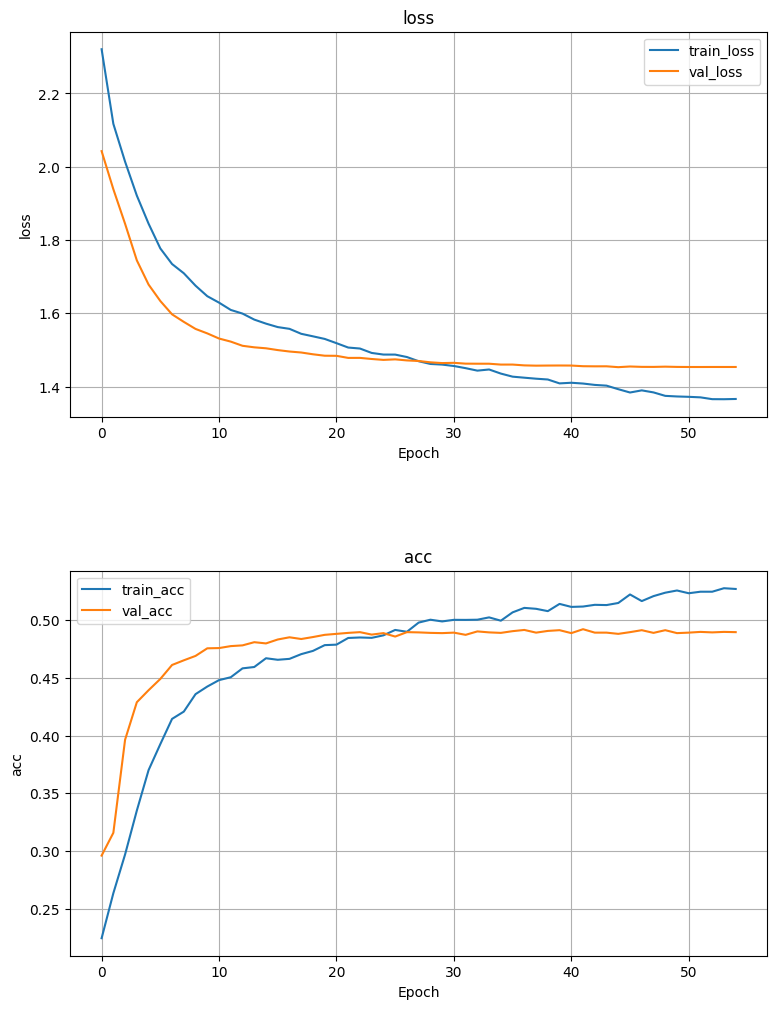

+---------------+----------+
|               |    Value |
|---------------+----------|
| acc           | 0.527258 |
| loss          |   1.3663 |
| val_acc       |   0.4898 |
| val_loss      |  1.45361 |
| learning_rate |    1e-06 |
+---------------+----------+


In [43]:
yjk_dl_history_plot(history, 'acc')